In [9]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance.Result import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_exfiltration_time_df, get_data_exfiltration_cdf, total_control_host_capture_times
from statistics import mean
import seaborn as sns
# set seaborn font size
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("pastel")

import pandas as pd

In [10]:
# Equifax d0_h0
equifax_standalone_d0_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/equifax/equifax_standalone_d0_h0'))
dfs_standalone_d0_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/dfs/dfs_standalone_d0_h0'))
targeted_standalone_d0_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/targeted/targeted_standalone_d0_h0'))
persistentdfs_standalone_d0_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/persistent_dfs/persistentdfs_standalone_d0_h0'))
darkside_standalone_d0_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/darkside/darkside_standalone_d0_h0'))

equifax_standalone_d0_data = {}
equifax_standalone_d0_data.update(equifax_standalone_d0_h0)
equifax_standalone_d0_data.update(dfs_standalone_d0_h0)
equifax_standalone_d0_data.update(targeted_standalone_d0_h0)
equifax_standalone_d0_data.update(persistentdfs_standalone_d0_h0)
equifax_standalone_d0_data.update(darkside_standalone_d0_h0)

# Equifax d10_h0
equifax_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/equifax/equifax_standalone_d10_h0'))
dfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/dfs/dfs_standalone_d10_h0'))
targeted_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/targeted/targeted_standalone_d10_h0'))
persistentdfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/persistent_dfs/persistentdfs_standalone_d10_h0'))
darkside_standalone_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/darkside/darkside_standalone_d10_h0'))

equifax_standalone_d10_data = {}
equifax_standalone_d10_data.update(equifax_standalone_d10_h0)
equifax_standalone_d10_data.update(dfs_standalone_d10_h0)
equifax_standalone_d10_data.update(targeted_standalone_d10_h0)
equifax_standalone_d10_data.update(persistentdfs_standalone_d10_h0) 
equifax_standalone_d10_data.update(darkside_standalone_d10_h0)

# Equifax d10_h50
equifax_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/equifax/equifax_standalone_d10_h50'))
dfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/dfs/dfs_standalone_d10_h50'))
targeted_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/targeted/targeted_standalone_d10_h50'))
persistentdfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/persistent_dfs/persistentdfs_standalone_d10_h50'))
darkside_standalone_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/standalone/darkside/darkside_standalone_d10_h50'))

equifax_standalone_d10_h50_data = {}
equifax_standalone_d10_h50_data.update(equifax_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(dfs_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(targeted_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(persistentdfs_standalone_d10_h50)
equifax_standalone_d10_h50_data.update(darkside_standalone_d10_h50)

# Equifax layered
equifax_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/equifax/baseline_layered_d10_h50'))
dfs_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/dfs/dfs_layered_d10_h50'))
targeted_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/targeted/targeted_layered_d10_h50'))
persistentdfs_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/persistent_dfs/persistentdfs_layered_d10_h50'))
darkside_layered = ingest_experiment_results(path.join('data/EquifaxLarge/layered/darkside/darkside_layered_d10_h50'))

equifax_layered_data = {}
equifax_layered_data.update(equifax_layered)
equifax_layered_data.update(dfs_layered)
equifax_layered_data.update(targeted_layered)
equifax_layered_data.update(persistentdfs_layered)
equifax_layered_data.update(darkside_layered)

# Equifax reactive simple
equifax_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d10_h0'))
dfs_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/dfs/dfs_reactiveSimple'))
targeted_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/targeted/targeted_reactiveSimple'))
persistentdfs_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/persistent_dfs/persistentdfs_reactiveSimple'))
darkside_reactive_simple = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/darkside/darkside_reactiveSimple'))

equifax_reactive_simple_data = {}
equifax_reactive_simple_data.update(equifax_reactive_simple)
equifax_reactive_simple_data.update(dfs_reactive_simple)
equifax_reactive_simple_data.update(targeted_reactive_simple)
equifax_reactive_simple_data.update(persistentdfs_reactive_simple)
equifax_reactive_simple_data.update(darkside_reactive_simple)


In [11]:
equifax_standalone_d10_data_times = get_exfiltration_time_df(equifax_standalone_d10_data, 48, 'basic_honeypot')
equifax_standalone_d10_h50_data_times = get_exfiltration_time_df(equifax_standalone_d10_h50_data, 48, 'mixed_deception')
equifax_layered_data_times = get_exfiltration_time_df(equifax_layered_data, 48, 'layered')
equifax_reactive_simple_data_times = get_exfiltration_time_df(equifax_reactive_simple_data, 48, 'reactive_simple')
equifax_baseline_times = get_exfiltration_time_df(equifax_standalone_d0_data, 48, 'baseline')


# Merge dfs into 1 df
equifax_data = pd.concat([equifax_standalone_d10_data_times, 
                          equifax_baseline_times,
                          equifax_standalone_d10_h50_data_times, 
                          equifax_layered_data_times, 
                          equifax_reactive_simple_data_times])

# Rename attacker 'EquifaxBaselineAttacker' to 'equifax_baseline'
equifax_data['attacker'] = equifax_data['attacker'].replace('EquifaxBaselineAttacker', 'equifax_baseline')

# Limit to first < 5 of experiment_num
equifax_data = equifax_data[equifax_data['experiment_num'] <= 5]

In [12]:
equifax_data_agg = (
    equifax_data.groupby('experiment')
    .agg({'percent_files_exfiltrated': {'mean'}, 'time_exfiltrated': 'median', 'defender': 'first', 'attacker': 'first'})
    .reset_index()
)
equifax_data_agg


,experiment,percent_files_exfiltrated,time_exfiltrated,defender,attacker
,,mean,time_exfiltrated,defender,attacker
0,baseline_layered_d10_h50,100.000000,58.487053,layered,equifax_baseline
1,baseline_reactiveStandalone_d10_h0,100.000000,39.282219,reactive_simple,equifax_baseline
2,baseline_standalone_d10_h0,100.000000,41.804096,basic_honeypot,equifax_baseline
3,baseline_standalone_d10_h50,100.000000,42.557180,mixed_deception,equifax_baseline
4,darkside_layered_d10_h50,99.166667,43.343499,layered,darkside
5,darkside_reactiveSimple,60.000000,63.268800,reactive_simple,darkside
6,darkside_standalone_d0_h0,100.000000,38.004393,baseline,darkside
7,darkside_standalone_d10_h0,100.000000,42.460860,basic_honeypot,darkside
8,darkside_standalone_d10_h50,100.000000,43.412399,mixed_deception,darkside


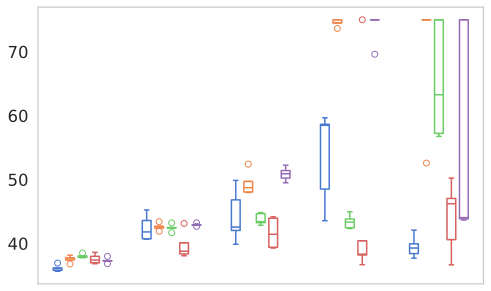

In [13]:
# change seaborn colors
sns.set_palette("muted")
# Remove rows where time_exfiltrated is 0
# filtered_equifax_data = equifax_data[equifax_data['percent_files_exfiltrated'] > 90]

# Bar plot
plt.figure(figsize=(8, 5))
defender_order = ['baseline', 'basic_honeypot', 'mixed_deception', 'layered', 'reactive_simple']
attacker_order = ['equifax_baseline', 'network_DFS', 'darkside', 'targeted', 'persistent_dfs_planner']
# sns.barplot(x='defender', y='time_exfiltrated', hue='attacker', data=equifax_data,
#             order=defender_order, hue_order=attacker_order,
#             width=.7, legend=False, gap=0.1, dodge=True, estimator='mean',
#             err_kws={'linewidth': 1.5}, capsize=0.1)

sns.boxplot(x='defender', y='time_exfiltrated', hue='attacker', data=equifax_data,
            order=defender_order, hue_order=attacker_order,
            width=.7, legend=False, gap=0.3, dodge=True, fill=False)

plt.gca().set(xlabel=None, ylabel=None)  # Removes axis labels
# Hide x axis tick labels
plt.xticks([], [])

# Save as SVG file
plt.savefig('plots/equifax_bar_summary.svg', format='svg')

In [14]:
# ICS d0_h0
equifax_standalone_d0_h0 = ingest_experiment_results(path.join('data/ICS/standalone/equifax/equifax_standalone_d0_h0'))
dfs_standalone_d0_h0 = ingest_experiment_results(path.join('data/ICS/standalone/dfs/dfs_standalone_d0_h0'))
targeted_standalone_d0_h0 = ingest_experiment_results(path.join('data/ICS/standalone/targeted/targeted_standalone_d0_h0'))
persistentdfs_standalone_d0_h0 = ingest_experiment_results(path.join('data/ICS/standalone/persistent_dfs/persistentdfs_standalone_d0_h0'))
darkside_standalone_d0_h0 = ingest_experiment_results(path.join('data/ICS/standalone/darkside/darkside_standalone_d0_h0'))

ics_standalone_d0_h0_data = {}
ics_standalone_d0_h0_data.update(equifax_standalone_d0_h0)
ics_standalone_d0_h0_data.update(dfs_standalone_d0_h0)
ics_standalone_d0_h0_data.update(targeted_standalone_d0_h0)
ics_standalone_d0_h0_data.update(persistentdfs_standalone_d0_h0)
ics_standalone_d0_h0_data.update(darkside_standalone_d0_h0)

# ICS d10_h0
equifax_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/equifax/equifax_standalone_d10_h0'))
dfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/dfs/dfs_standalone_d10_h0'))
targeted_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/targeted/targeted_standalone_d10_h0'))
persistentdfs_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/persistent_dfs/persistentdfs_standalone_d10_h0'))
darkside_standalone_d10_h0 = ingest_experiment_results(path.join('data/ICS/standalone/darkside/darkside_standalone_d10_h0'))

ics_standalone_d10_h0_data = {}
ics_standalone_d10_h0_data.update(equifax_standalone_d10_h0)
ics_standalone_d10_h0_data.update(dfs_standalone_d10_h0)
ics_standalone_d10_h0_data.update(targeted_standalone_d10_h0)
ics_standalone_d10_h0_data.update(persistentdfs_standalone_d10_h0)
ics_standalone_d10_h0_data.update(darkside_standalone_d10_h0)

# ICS d10_h50
equifax_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/equifax/equifax_standalone_d10_h50'))
dfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/dfs/dfs_standalone_d10_h50'))
targeted_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/targeted/targeted_standalone_d10_h50'))
persistentdfs_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/persistent_dfs/persistentdfs_standalone_d10_h50'))
darkside_standalone_d10_h50 = ingest_experiment_results(path.join('data/ICS/standalone/darkside/darkside_standalone_d10_h50'))

ics_standalone_d10_h50_data = {}
ics_standalone_d10_h50_data.update(equifax_standalone_d10_h50)
ics_standalone_d10_h50_data.update(dfs_standalone_d10_h50)
ics_standalone_d10_h50_data.update(targeted_standalone_d10_h50)
ics_standalone_d10_h50_data.update(persistentdfs_standalone_d10_h50)
ics_standalone_d10_h50_data.update(darkside_standalone_d10_h50)

# ICS Layered
equifax_layered = ingest_experiment_results(path.join('data/ICS/layered/equifax/equifax_layered_d10_h50'))
dfs_layered = ingest_experiment_results(path.join('data/ICS/layered/dfs/dfs_layered_d10_h50'))
targeted_layered = ingest_experiment_results(path.join('data/ICS/layered/targeted/targeted_layered_d10_h50'))
persistentdfs_layered = ingest_experiment_results(path.join('data/ICS/layered/persistent_dfs/persistentdfs_layered_d10_h50'))
darkside_layered = ingest_experiment_results(path.join('data/ICS/layered/darkside/darkside_layered_d10_h50'))

ics_layered_data = {}
ics_layered_data.update(equifax_layered)
ics_layered_data.update(dfs_layered)
ics_layered_data.update(targeted_layered)
ics_layered_data.update(persistentdfs_layered)
ics_layered_data.update(darkside_layered)

# ICS Reactive
equifax_reactive = ingest_experiment_results(path.join('data/ICS/reactive/equifax/equifax_reactiveSimple'))
dfs_reactive = ingest_experiment_results(path.join('data/ICS/reactive/dfs/dfs_reactiveSimple'))
targeted_reactive = ingest_experiment_results(path.join('data/ICS/reactive/targeted/targeted_reactiveSimple'))
persistentdfs_reactive = ingest_experiment_results(path.join('data/ICS/reactive/persistent_dfs/persistentdfs_reactiveSimple'))
darkside_reactive = ingest_experiment_results(path.join('data/ICS/reactive/darkside/darkside_reactiveSimple'))

ics_reactive_data = {}
ics_reactive_data.update(equifax_reactive)
ics_reactive_data.update(dfs_reactive)
ics_reactive_data.update(targeted_reactive)
ics_reactive_data.update(persistentdfs_reactive)
ics_reactive_data.update(darkside_reactive)


# ICS Mislead
equifax_mislead = ingest_experiment_results(path.join('data/ICS/mislead/equifax_mislead'))
dfs_mislead = ingest_experiment_results(path.join('data/ICS/mislead/dfs_mislead'))
targeted_mislead = ingest_experiment_results(path.join('data/ICS/mislead/targeted_mislead'))
persistentdfs_mislead = ingest_experiment_results(path.join('data/ICS/mislead/persistentdfs_mislead'))
darkside_mislead = ingest_experiment_results(path.join('data/ICS/mislead/darkside_mislead'))

ics_mislead_data = {}
ics_mislead_data.update(equifax_mislead)
ics_mislead_data.update(dfs_mislead)
ics_mislead_data.update(targeted_mislead)
ics_mislead_data.update(persistentdfs_mislead)
ics_mislead_data.update(darkside_mislead)


In [15]:
ics_baseline_times = total_control_host_capture_times(ics_standalone_d0_h0_data, 'baseline')
ics_standalone_d10_data_times = total_control_host_capture_times(ics_standalone_d10_h0_data, 'basic_honeypot')
ics_standalone_d10_h50_data_times = total_control_host_capture_times(ics_standalone_d10_h50_data, 'mixed_deception')
ics_layered_data_times = total_control_host_capture_times(ics_layered_data, 'layered')
ics_reactive_data_times = total_control_host_capture_times(ics_reactive_data, 'reactive_simple')


ics_data = pd.concat([ics_baseline_times,
                      ics_standalone_d10_data_times, 
                      ics_standalone_d10_h50_data_times, 
                      ics_layered_data_times, 
                      ics_reactive_data_times])

# Rename DFSAttacker to network_DFS
ics_data['attacker'] = ics_data['attacker'].replace('DFSAttacker', 'network_DFS')
# Rename ICSTargetedAttacker to targeted
ics_data['attacker'] = ics_data['attacker'].replace('ICSTargetedAttacker', 'targeted')

/home/brian/Perry/data_analysis/src/query_data.py:242: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[df.shape[0]] = [
/home/brian/Perry/data_analysis/src/query_data.py:242: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[df.shape[0]] = [
/home/brian/Perry/data_analysis/src/query_data.py:242: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the re

In [16]:
ics_data_agg = (
    ics_data.groupby('experiment')
    .agg({'percent_hosts_infected': {'mean', 'std'}, 'time_taken': 'median', 'defender': 'first', 'attacker': 'first'})
    .reset_index()
)
ics_data_agg

experiment percent_hosts_infected        time_taken  \
                                                        std   mean     median   
0                           Baseline               0.000000  100.0  16.430956   
1           darkside_layered_d10_h50               0.000000  100.0  13.939142   
2            darkside_reactiveSimple              54.772256   40.0  24.000000   
3          darkside_standalone_d0_h0               0.000000  100.0  10.618322   
4         darkside_standalone_d10_h0               0.000000  100.0  13.830808   
5        darkside_standalone_d10_h50               0.000000  100.0  16.873783   
6                dfs_layered_d10_h50               0.000000  100.0  20.712327   
7                 dfs_reactiveSimple              54.772256   60.0  12.993071   
8               dfs_standalone_d0_h0               0.000000  100.0  11.934312   
9              dfs_standalone_d10_h0               0.000000  100.0  13.924479   
10           equifax_layered_d10_h50               0.000000    0.0  24.000000   
11            equifax_reactiveSimple               0.000000    0.0  24.000000   
12          equifax_standalone_d0_h0               0.000000    0.0  24.000000   
13         equifax_standalone_d10_h0               0.000000    0.0  24.000000   
14        equifax_standalone_d10_h50               0.000000    0.0  24.000000   
15     persistentdfs_layered_d10_h50               0.000000  100.0  17.362173   
16      persistentdfs_reactiveSimple              44.721360   20.0  24.000000   
17    persistentdfs_standalone_d0_h0               0.000000  100.0  11.482492   
18   persistentdfs_standalone_d10_h0               0.000000  100.0  12.322814   
19  persistentdfs_standalone_d10_h50               0.000000  100.0  18.910009   
20          targeted_layered_d10_h50               0.000000  100.0  14.430485   
21           targeted_reactiveSimple              44.721360   20.0  24.000000   
22         targeted_standalone_d0_h0               0.000000  100.0  11.156673   
23        targeted_standalone_d10_h0               0.000000  100.0  13.794688   
24       targeted_standalone_d10_h50               0.000000  100.0  16.580044   

           defender                attacker  
              first                   first  
0   mixed_deception             network_DFS  
1           layered                darkside  
2   reactive_simple                darkside  
3          baseline                darkside  
4    basic_honeypot                darkside  
5   mixed_deception                darkside  
6           layered             network_DFS  
7   reactive_simple             network_DFS  
8          baseline             network_DFS  
9    basic_honeypot             network_DFS  
10          layered        equifax_baseline  
11  reactive_simple        equifax_baseline  
12         baseline        equifax_baseline  
13   basic_honeypot        equifax_baseline  
14  mixed_deception        equifax_baseline  
15          layered  persistent_dfs_planner  
16  reactive_simple  persistent_dfs_planner  
17         baseline  persistent_dfs_planner  
18   basic_honeypot  persistent_dfs_planner  
19  mixed_deception  persistent_dfs_planner  
20          layered                targeted  
21  reactive_simple                targeted  
22         baseline                targeted  
23   basic_honeypot                targeted  
24  mixed_deception                targeted

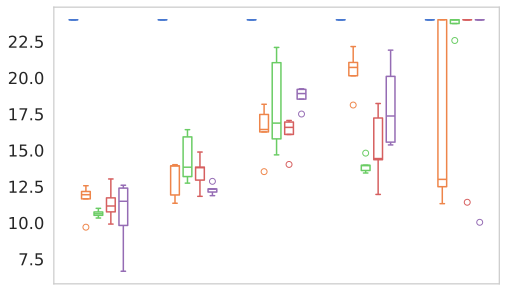

In [17]:
# Remove rows where time_exfiltrated is 0
# filtered_ics_data = ics_data[ics_data['percent_hosts_infected'] > 90]

plt.figure(figsize=(8, 5))
defender_order = ['baseline', 'basic_honeypot', 'mixed_deception', 'layered', 'reactive_simple']
attacker_order = ['equifax_baseline', 'network_DFS', 'darkside', 'targeted', 'persistent_dfs_planner']
# sns.barplot(x='defender', y='time_taken', hue='attacker', data=filtered_ics_data,
#             order=defender_order, hue_order=attacker_order,
#             width=.9, legend=False, gap=0.1, dodge=True, estimator='mean',
#             err_kws={'linewidth': 1.5}, capsize=0.1)

sns.boxplot(x='defender', y='time_taken', hue='attacker', data=ics_data,
            order=defender_order, hue_order=attacker_order,
            width=.7, legend=False, gap=0.3, dodge=True, fill=False)

plt.gca().set(xlabel=None, ylabel=None)  # Removes axis labels
# Hide x axis tick labels
plt.xticks([], [])
# Save as SVG file
plt.savefig('plots/ics_bar_summary.svg', format='svg')

In [18]:
filtered_ics_data

NameError: name 'filtered_ics_data' is not defined

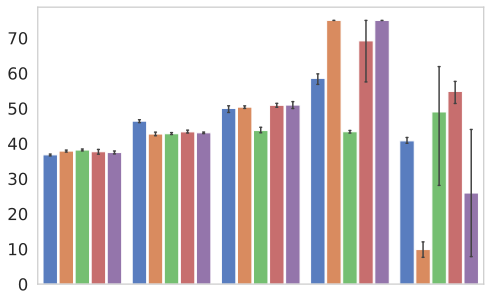

In [ ]:
plt.figure(figsize=(8, 5))
defender_order = ['baseline', 'basic_honeypot', 'mixed_deception', 'layered', 'reactive_simple']
attacker_order = ['equifax_baseline', 'network_DFS', 'darkside', 'targeted', 'persistent_dfs_planner']
sns.barplot(x='defender', y='execution_time', hue='attacker', data=equifax_data,
            order=defender_order, hue_order=attacker_order,
            width=.9, legend=False, gap=0.1, dodge=True, estimator='mean',
            err_kws={'linewidth': 1.5}, capsize=0.1)

plt.gca().set(xlabel=None, ylabel=None)  # Removes axis labels
# Hide x axis tick labels
plt.xticks([], [])
# Save as SVG file
plt.savefig('plots/equifax_execution_time.svg', format='svg')

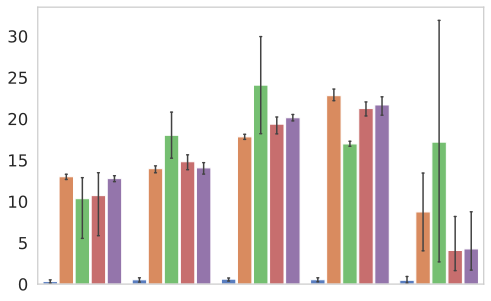

In [ ]:
plt.figure(figsize=(8, 5))
defender_order = ['baseline', 'basic_honeypot', 'mixed_deception', 'layered', 'reactive_simple']
attacker_order = ['equifax_baseline', 'network_DFS', 'darkside', 'targeted', 'persistent_dfs_planner']
sns.barplot(x='defender', y='execution_time', hue='attacker', data=ics_data,
            order=defender_order, hue_order=attacker_order,
            width=.9, legend=False, gap=0.1, dodge=True, estimator='mean',
            err_kws={'linewidth': 1.5}, capsize=0.1)

plt.gca().set(xlabel=None, ylabel=None)  # Removes axis labels
# Hide x axis tick labels
plt.xticks([], [])
# Save as SVG file
plt.savefig('plots/ics_execution_time.svg', format='svg')

In [ ]:
# Equifax execution time range
equifax_data.agg({'execution_time': ['min', 'max']})

,execution_time
min,7.573104
max,75.024314


In [ ]:
ics_data.agg({'execution_time': ['min', 'max']})

,execution_time
min,0.121791
max,39.466044
